In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
df = pd.read_csv(r'C:\Users\SONAWANE\Documents\DSBDA_DATASET\5. Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.shape

(400, 5)

In [23]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()


In [25]:
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [26]:
X = dataset.drop(['Purchased'], axis = 1) 
y = dataset['Purchased']


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('Dataset shape =',dataset.shape)
print('X_train shape =',X_train.shape)
print('X_test shape =',X_test.shape)
print('y_train shape =',y_train.shape)
print('y_test shape =',y_test.shape)


Dataset shape = (400, 5)
X_train shape = (300, 4)
X_test shape = (100, 4)
y_train shape = (300,)
y_test shape = (100,)


In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
390    1
128    0
188    0
213    0
351    0
9      0
282    1
10     0
203    0
37     0
88     0
70     0
327    0
226    1
353    0
18     1
256    0
59     0
379    1
65     0
Name: Purchased, dtype: int64


In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
#from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[59  1]
 [14 26]]


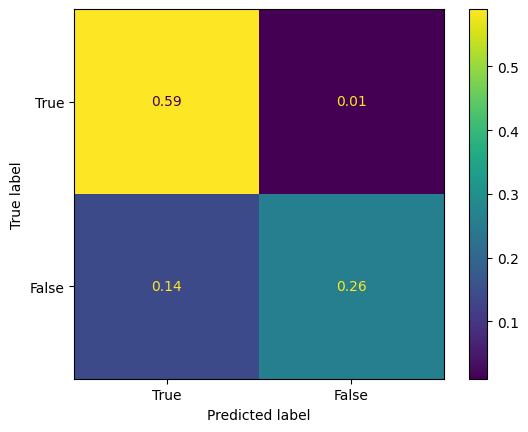

In [31]:
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['True','False'])
cmd.plot()


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        60
           1       0.96      0.65      0.78        40

    accuracy                           0.85       100
   macro avg       0.89      0.82      0.83       100
weighted avg       0.87      0.85      0.84       100

